In [ ]:
import numpy as np
import torch 
# Install required packages.
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-geometric

# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(out.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()


     |████████████████████████████████| 2.6MB 6.8MB/s 
     |████████████████████████████████| 1.5MB 6.8MB/s 
     |████████████████████████████████| 215kB 8.6MB/s 
     |████████████████████████████████| 235kB 13.4MB/s 
     |████████████████████████████████| 2.2MB 15.4MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 


In [ ]:
# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive/


Mounted at /content/drive
/content/drive/My Drive


In [ ]:
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-geometric

In [ ]:
!pip install Cora

In [ ]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())

print()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]
print()
print(data)
print('===========================================================================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Number of validation nodes: {data.val_mask.sum()}')
print(f'Number of test nodes: {data.test_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7

Data(edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Number of validation nodes: 500
Number of test nodes: 1000
Training node label rate: 0.05
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


Here we can see that the number of training nodes are 140, validation nodes are 500, and testing nodes are 1000. 

In [ ]:
import torch
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(MLP, self).__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(dataset.num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x

model = MLP(hidden_channels=16)
print(model)

MLP(
  (lin1): Linear(in_features=1433, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=7, bias=True)
)


In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = MLP(hidden_channels=16)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  # Define optimizer.

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

for epoch in range(1, 2000):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')



<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.9615
Epoch: 002, Loss: 1.9557
Epoch: 003, Loss: 1.9505
Epoch: 004, Loss: 1.9423
Epoch: 005, Loss: 1.9327
Epoch: 006, Loss: 1.9279
Epoch: 007, Loss: 1.9144
Epoch: 008, Loss: 1.9087
Epoch: 009, Loss: 1.9023
Epoch: 010, Loss: 1.8893
Epoch: 011, Loss: 1.8776
Epoch: 012, Loss: 1.8594
Epoch: 013, Loss: 1.8457
Epoch: 014, Loss: 1.8365
Epoch: 015, Loss: 1.8280
Epoch: 016, Loss: 1.7965
Epoch: 017, Loss: 1.7984
Epoch: 018, Loss: 1.7832
Epoch: 019, Loss: 1.7495
Epoch: 020, Loss: 1.7441
Epoch: 021, Loss: 1.7188
Epoch: 022, Loss: 1.7124
Epoch: 023, Loss: 1.6785
Epoch: 024, Loss: 1.6660
Epoch: 025, Loss: 1.6119
Epoch: 026, Loss: 1.6236
Epoch: 027, Loss: 1.5827
Epoch: 028, Loss: 1.5784
Epoch: 029, Loss: 1.5524
Epoch: 030, Loss: 1.5020
Epoch: 031, Loss: 1.5065
Epoch: 032, Loss: 1.4742
Epoch: 033, Loss: 1.4581
Epoch: 034, Loss: 1.4246
Epoch: 035, Loss: 1.4131
Epoch: 036, Loss: 1.4112
Epoch: 037, Loss: 1.3923
Epoch: 038, Loss: 1.3055
Epoch: 039, Loss: 1.2982
Epoch: 040, Loss: 1.2543


In [ ]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.6020


In [ ]:
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GCN(hidden_channels=16)
print(model)

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)


In [ ]:
!pip install pytorch-ignite
import ignite.distributed as idist
from ignite.engine import Engine, Events
from ignite.handlers import EarlyStopping



     |████████████████████████████████| 204kB 7.8MB/s 


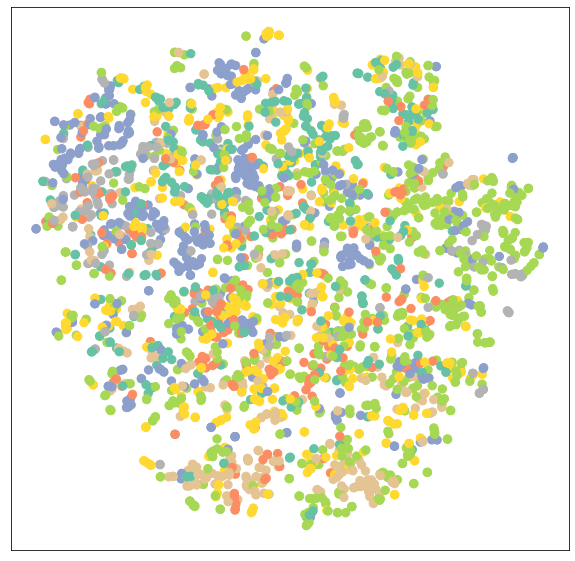

In [ ]:
model = GCN(hidden_channels=16)
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x, data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def val_gnn():
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      val_correct = pred[data.val_mask] == data.y[data.val_mask]  # Check against ground-truth labels.
      val_acc = int(val_correct.sum()) / int(data.val_mask.sum())  # Derive ratio of correct predictions.
      return val_acc


def test_gnn():
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc


min_val_loss = 2
n_epochs_stop = 7
epochs_no_improve = 0
epochs_no_improve_v = 0
val_loss = 0
prev = 0
prev_v = 0
diff = 0.005
for epoch in range(1, 1000): # could be changed to a while True, but not necessary.
    loss = train()
    new = test_gnn()
    if abs((new - prev)) < diff  :
      
      epochs_no_improve +=1
      if epochs_no_improve > n_epochs_stop :
        new_v = val_gnn()
        if abs((new_v - prev_v)) < diff  :
      
          epochs_no_improve_v +=1
          if epochs_no_improve_v > n_epochs_stop :
          #print("hej")
            break
        #else:
          
      #else:
        prev_v = new_v
        continue

    else:
      epochs_no_improve = 0
      epochs_no_improve_v =0    
    prev = new
    #prev_v = new_v   
    if epoch%5 == 0 :
      test_acc_gnn = test_gnn()
      val_acc_gnn = val_gnn()
      print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
      print(f'Test Accuracy: {test_acc_gnn:.4f}')
      print(f'Val Accuracy: {val_acc_gnn:.4f}')

print(f'final Test Accuracy: {test_acc_gnn:.4f}')


<IPython.core.display.Javascript object>

Epoch: 005, Loss: 1.9126
Test Accuracy: 0.5580
Val Accuracy: 0.5360
Epoch: 010, Loss: 1.8616
Test Accuracy: 0.7660
Val Accuracy: 0.7600
Epoch: 015, Loss: 1.7979
Test Accuracy: 0.7540
Val Accuracy: 0.7300
Epoch: 020, Loss: 1.7184
Test Accuracy: 0.7560
Val Accuracy: 0.7300
Epoch: 025, Loss: 1.6353
Test Accuracy: 0.7580
Val Accuracy: 0.7440
Epoch: 030, Loss: 1.5370
Test Accuracy: 0.7570
Val Accuracy: 0.7580
Epoch: 035, Loss: 1.4479
Test Accuracy: 0.7710
Val Accuracy: 0.7620
Epoch: 040, Loss: 1.3363
Test Accuracy: 0.7840
Val Accuracy: 0.7720
Epoch: 045, Loss: 1.2330
Test Accuracy: 0.7900
Val Accuracy: 0.7640
Epoch: 050, Loss: 1.1714
Test Accuracy: 0.7980
Val Accuracy: 0.7800
Epoch: 055, Loss: 1.0589
Test Accuracy: 0.8040
Val Accuracy: 0.7840
Epoch: 070, Loss: 0.8705
Test Accuracy: 0.8060
Val Accuracy: 0.7820
Epoch: 080, Loss: 0.7248
Test Accuracy: 0.8120
Val Accuracy: 0.7860
Epoch: 085, Loss: 0.6872
Test Accuracy: 0.8130
Val Accuracy: 0.7860
Epoch: 090, Loss: 0.6769
Test Accuracy: 0.8160
V

In [ ]:
test_acc_gnn = test_gnn()
val_acc_gnn = val_gnn()
print(f'Test Accuracy: {test_acc_gnn:.4f}')
print(f'val Accuracy: {val_acc_gnn:.4f}')
print(20%5 == 0)

Test Accuracy: 0.8130
val Accuracy: 0.7940
True


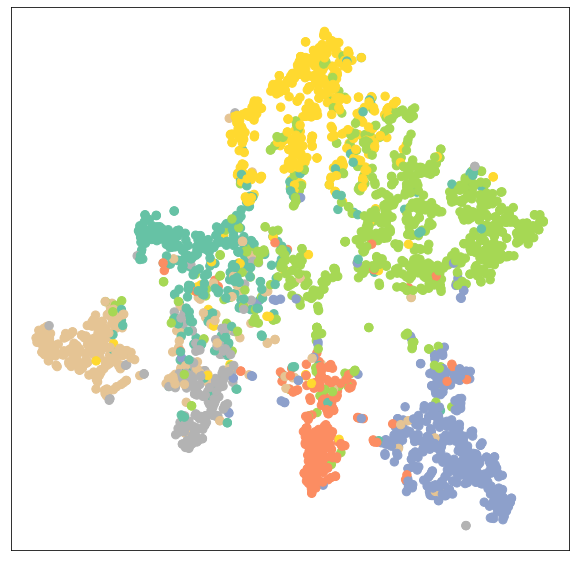

In [ ]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

In [ ]:
!pip install torch-geometric \
  torch-sparse==latest+cu101 \
  torch-spline-conv==latest+cu101 \
  torch-scatter==latest+cu101 \
  torch-cluster==latest+cu101 \
  -f https://pytorch-geometric.com/whl/torch-1.4.0.html

Looking in links: https://pytorch-geometric.com/whl/torch-1.4.0.html
     |████████████████████████████████| 15.2MB 245kB/s 
     |████████████████████████████████| 5.1MB 62.8MB/s 
     |████████████████████████████████| 10.6MB 28.1MB/s 
     |████████████████████████████████| 14.5MB 121kB/s 
  Found existing installation: torch-sparse 0.6.9
    Uninstalling torch-sparse-0.6.9:
      Successfully uninstalled torch-sparse-0.6.9
  Found existing installation: torch-scatter 2.0.6
    Uninstalling torch-scatter-2.0.6:
      Successfully uninstalled torch-scatter-2.0.6


In [ ]:
from torch_geometric.nn import GATConv
#from torch_spline_conv import SplineConv


class GAT(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GAT, self).__init__()
        heads = 4
        self.conv1 = GATConv(in_channels, 8, heads, dropout=0.6)
        self.conv2 = GATConv(8 * heads, out_channels, dropout=0.6)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.dropout(x, p=0.6, training=self.training)
        x = F.elu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

model2 = GAT(dataset.num_features, 8)
print(model2)

GAT(
  (conv1): GATConv(1433, 8, heads=4)
  (conv2): GATConv(32, 8, heads=1)
)


In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model2
optimizer = torch.optim.Adam(model2.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model2.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model2(data)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def val_gnn():
      model2.eval()
      out = model2(data)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      val_correct = pred[data.val_mask] == data.y[data.val_mask]  # Check against ground-truth labels.
      val_acc = int(val_correct.sum()) / int(data.val_mask.sum())  # Derive ratio of correct predictions.
      return val_acc


def test_gnn():
      model2.eval()
      out = model2(data)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc


min_val_loss = 2
n_epochs_stop = 7
epochs_no_improve = 0
epochs_no_improve_v = 0
val_loss = 0
prev = 0
prev_v = 0
diff = 0.005
for epoch in range(1, 1000): # could be changed to a while True, but not necessary.
    loss = train()
    new = test_gnn()
    if abs((new - prev)) < diff  :
      
      epochs_no_improve +=1
      if epochs_no_improve > n_epochs_stop :
        new_v = val_gnn()
        if abs((new_v - prev_v)) < diff  :
      
          epochs_no_improve_v +=1
          print(new_v)
          if epochs_no_improve_v > n_epochs_stop :
          #print("hej")
            break
          if val_gnn() > 0.81:
            break
        #else:
          
      #else:
        prev_v = new_v
        continue

    else:
      epochs_no_improve = 0
      epochs_no_improve_v =0    
    prev = new
    #prev_v = new_v   
    if epoch%5 == 0 :
      test_acc_gnn = test_gnn()
      val_acc_gnn = val_gnn()
      print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
      print(f'Test Accuracy: {test_acc_gnn:.4f}')
      print(f'Val Accuracy: {val_acc_gnn:.4f}')

print(f'final Test Accuracy: {test_acc_gnn:.4f}')
print(f'final val  Accuracy: {val_acc_gnn:.4f}')

<IPython.core.display.Javascript object>

Epoch: 005, Loss: 2.0007
Test Accuracy: 0.2770
Val Accuracy: 0.2500
Epoch: 010, Loss: 1.9391
Test Accuracy: 0.5120
Val Accuracy: 0.5100
Epoch: 015, Loss: 1.8670
Test Accuracy: 0.4840
Val Accuracy: 0.4860
Epoch: 020, Loss: 1.7928
Test Accuracy: 0.6340
Val Accuracy: 0.6460
Epoch: 025, Loss: 1.6853
Test Accuracy: 0.7750
Val Accuracy: 0.7700
Epoch: 030, Loss: 1.6362
Test Accuracy: 0.8130
Val Accuracy: 0.8040
Epoch: 035, Loss: 1.6117
Test Accuracy: 0.8230
Val Accuracy: 0.8040
Epoch: 040, Loss: 1.5210
Test Accuracy: 0.7810
Val Accuracy: 0.7820
Epoch: 045, Loss: 1.4101
Test Accuracy: 0.7840
Val Accuracy: 0.7940
Epoch: 050, Loss: 1.3664
Test Accuracy: 0.7740
Val Accuracy: 0.7760
Epoch: 055, Loss: 1.2466
Test Accuracy: 0.8010
Val Accuracy: 0.8020
Epoch: 060, Loss: 1.1013
Test Accuracy: 0.8140
Val Accuracy: 0.8100
Epoch: 065, Loss: 1.1855
Test Accuracy: 0.8000
Val Accuracy: 0.8080
Epoch: 070, Loss: 1.0643
Test Accuracy: 0.8110
Val Accuracy: 0.8060
Epoch: 075, Loss: 1.1549
Test Accuracy: 0.7990
V

In [ ]:
test_acc_gnn = test_gnn()
val_acc_gnn = val_gnn()
print(f'Test Accuracy: {test_acc_gnn:.4f}')
print(f'val Accuracy: {val_acc_gnn:.4f}')
print(20%5 == 0)

Test Accuracy: 0.8320
val Accuracy: 0.8060
True


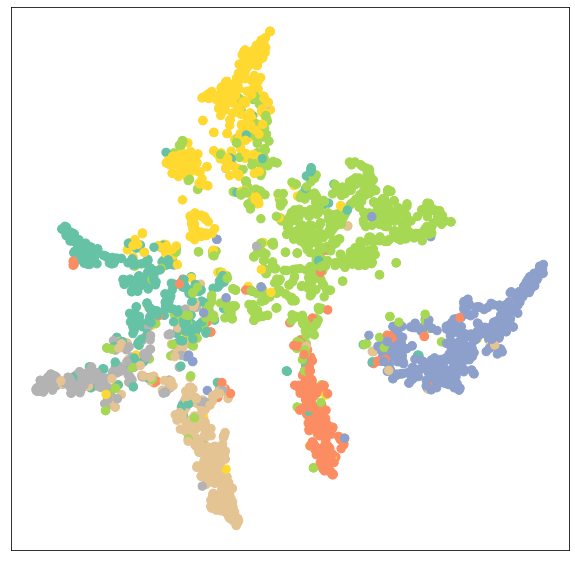

In [ ]:
model2.eval()

out = model2(data)
visualize(out, color=data.y)

In [ ]:
!pip install easydict

In [ ]:
from __future__ import division

import time

import torch
import torch.nn.functional as F
from torch import tensor
from torch.optim import Adam

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


def index_to_mask(index, size):
    mask = torch.zeros(size, dtype=torch.bool, device=index.device)
    mask[index] = 1
    return mask


def random_planetoid_splits(data, num_classes):

    indices = []
    for i in range(num_classes):
        index = (data.y == i).nonzero().view(-1)
        index = index[torch.randperm(index.size(0))]
        indices.append(index)

    train_index = torch.cat([i[:20] for i in indices], dim=0)

    rest_index = torch.cat([i[20:] for i in indices], dim=0)
    rest_index = rest_index[torch.randperm(rest_index.size(0))]

    data.train_mask = index_to_mask(train_index, size=data.num_nodes)
    data.val_mask = index_to_mask(rest_index[:500], size=data.num_nodes)
    data.test_mask = index_to_mask(rest_index[500:1500], size=data.num_nodes)

    return data


def run(dataset, model, runs, epochs, lr, weight_decay, early_stopping,
        permute_masks=None, logger=None):

    val_losses, accs, durations = [], [], []
    for _ in range(runs):
        data = dataset[0]
        if permute_masks is not None:
            data = permute_masks(data, dataset.num_classes)
        data = data.to(device)

        model.to(device).reset_parameters()
        optimizer = Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

        if torch.cuda.is_available():
            torch.cuda.synchronize()

        t_start = time.perf_counter()

        best_val_loss = float('inf')
        test_acc = 0
        val_loss_history = []

        for epoch in range(1, epochs + 1):
            train(model, optimizer, data)
            eval_info = evaluate(model, data)
            eval_info['epoch'] = epoch

            if logger is not None:
                logger(eval_info)

            if eval_info['val_loss'] < best_val_loss:
                best_val_loss = eval_info['val_loss']
                test_acc = eval_info['test_acc']

            val_loss_history.append(eval_info['val_loss'])
            if early_stopping > 0 and epoch > epochs // 2:
                tmp = tensor(val_loss_history[-(early_stopping + 1):-1])
                if eval_info['val_loss'] > tmp.mean().item():
                    break

        if torch.cuda.is_available():
            torch.cuda.synchronize()

        t_end = time.perf_counter()

        val_losses.append(best_val_loss)
        accs.append(test_acc)
        durations.append(t_end - t_start)

    loss, acc, duration = tensor(val_losses), tensor(accs), tensor(durations)

    print('Val Loss: {:.4f}, Test Accuracy: {:.3f} ± {:.3f}, Duration: {:.3f}'.
          format(loss.mean().item(),
                 acc.mean().item(),
                 acc.std().item(),
                 duration.mean().item()))


def train(model, optimizer, data):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()


def evaluate(model, data):
    model.eval()

    with torch.no_grad():
        logits = model(data)

    outs = {}
    for key in ['train', 'val', 'test']:
        mask = data['{}_mask'.format(key)]
        loss = F.nll_loss(logits[mask], data.y[mask]).item()
        pred = logits[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()

        outs['{}_loss'.format(key)] = loss
        outs['{}_acc'.format(key)] = acc

    return outs

In [ ]:
import easydict
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv
#from torch_geometric import run
#from torch_geometric.tr

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#from citation import get_planetoid_dataset, random_planetoid_splits, run

#parser = argparse.ArgumentParser()
args = easydict.EasyDict({
  "dataset": True,
  "random_splits": False,
  "runs": 100,
  "epochs": 1000,
  "lr": 0.00,
  "weight_decay": 0.000,
  "early_stopping": 100,
  "hidden": 8,
  "dropout": 0,
  "normalize_features": True,
  "heads": 8,
  "output_heads": 1
})
#args = parser.parse_args()


class Net(torch.nn.Module):
    def __init__(self, dataset):
        super(Net, self).__init__()
        self.conv1 = GATConv(
            dataset.num_features,
            args.hidden,
            heads=args.heads,
            dropout=args.dropout)
        self.conv2 = GATConv(
            args.hidden * args.heads,
            dataset.num_classes,
            heads=args.output_heads,
            concat=False,
            dropout=args.dropout)

    def reset_parameters(self):
        self.conv1.reset_parameters()
        self.conv2.reset_parameters()

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.dropout(x, p=args.dropout, training=self.training)
        x = F.elu(self.conv1(x, edge_index))
        x = F.dropout(x, p=args.dropout, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)


#dataset = planetoid_dataset(args.dataset, args.normalize_features)
permute_masks = random_planetoid_splits if args.random_splits else None
#model3 = run(dataset, Net(dataset), args.runs, args.epochs, args.lr, args.weight_decay, args.early_stopping, permute_masks)

In [ ]:
import torch, itertools
from torch.utils.data import TensorDataset
import os.path as osp


dat = torch.load("/content/drive/MyDrive/TIF360/lab1/graphs.pt")
print (len(dat))
lengths = len(dat) 
print(dat)
print(dat[1].edge_attr)

#def process(data):
#    data_list = []
#    edge_list = map(edge_index, data)
#
#process(dat)

#dat = transform=NormalizeFeatures()
#transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
#print(dat)
print(dat[1])
#eattr =map(a["egde_attr"] for a in dat)



4000
[Data(edge_attr=[72], edge_index=[2, 72], x=[9, 2], y=[1, 4]), Data(edge_attr=[30], edge_index=[2, 30], x=[6, 2], y=[1, 4]), Data(edge_attr=[12], edge_index=[2, 12], x=[4, 2], y=[1, 4]), Data(edge_attr=[0], edge_index=[2, 0], x=[1, 2], y=[1, 4]), Data(edge_attr=[182], edge_index=[2, 182], x=[14, 2], y=[1, 4]), Data(edge_attr=[42], edge_index=[2, 42], x=[7, 2], y=[1, 4]), Data(edge_attr=[42], edge_index=[2, 42], x=[7, 2], y=[1, 4]), Data(edge_attr=[12], edge_index=[2, 12], x=[4, 2], y=[1, 4]), Data(edge_attr=[6], edge_index=[2, 6], x=[3, 2], y=[1, 4]), Data(edge_attr=[6], edge_index=[2, 6], x=[3, 2], y=[1, 4]), Data(edge_attr=[12], edge_index=[2, 12], x=[4, 2], y=[1, 4]), Data(edge_attr=[6], edge_index=[2, 6], x=[3, 2], y=[1, 4]), Data(edge_attr=[0], edge_index=[2, 0], x=[1, 2], y=[1, 4]), Data(edge_attr=[12], edge_index=[2, 12], x=[4, 2], y=[1, 4]), Data(edge_attr=[12], edge_index=[2, 12], x=[4, 2], y=[1, 4]), Data(edge_attr=[12], edge_index=[2, 12], x=[4, 2], y=[1, 4]), Data(edge

In [ ]:
class CustomDataset(InMemoryDataset):
    def __init__(self, root, transform=None, pre_transform=None):
        super(CustomDataset, self).__init__(root, transform, pre_transform)
        self.data, self.slices = torch.load(self.processed_paths[0])
        
    @property
    def raw_file_names(self):
        return ['edge_list.csv', 'x.pt', 'y.pt', 'edge_attributes.csv']

    @property
    def processed_file_names(self):
        return ['graph.pt']

    def process(self):
        data_list = []
        edge_list = pd.read_csv(self.raw_paths[0], dtype=int)
        target_nodes = edge_list.iloc[:,0].values
        source_nodes = edge_list.iloc[:,1].values
        edge_index = torch.tensor([source_nodes, target_nodes], dtype=torch.int64)

        x = torch.load(self.raw_paths[1], map_location=torch.device('cpu'))
        y = torch.load(self.raw_paths[2], map_location=torch.device('cpu'))

        # make masks
        n = x.shape[0]
        randomassort = list(range(n))
        random.shuffle(randomassort)
        max_train = floor(len(randomassort) * .1)
        train_mask_idx = torch.tensor(randomassort[:max_train])
        test_mask_idx = torch.tensor(randomassort[max_train:])
        train_mask = torch.zeros(n); test_mask = torch.zeros(n)
        train_mask.scatter_(0, train_mask_idx, 1)
        test_mask.scatter_(0, test_mask_idx, 1)
        train_mask = train_mask.type(torch.bool)
        test_mask = test_mask.type(torch.bool)

        edge_attributes = pd.read_csv(self.raw_paths[3])

        data = Data(edge_index=edge_index, x=x, y=y, train_mask=train_mask, test_mask=test_mask)

        print(data.__dict__)
        data, slices = self.collate([data])
        torch.save((data, slices), self.processed_paths[0])

NameError: ignored

In [ ]:
import torch, itertools
from torch.utils.data import TensorDataset

def dataset_split(dataset, train_frac):
    '''
    param dataset:    Dataset object to be split
    param train_frac: Ratio of train set to whole dataset

    Randomly split dataset into a dictionary with keys, based on these ratios:
        'train': train_frac
        'valid': (1-split_frac) / 2
        'test': (1-split_frac) / 2
    '''
    assert train_frac >= 0 and train_frac <= 1, "Invalid training set fraction"

    length = len(dataset)

    # Use int to get the floor to favour allocation to the smaller valid and test sets    
    train_length = int(length * train_frac)
    valid_length = int((length - train_length) / 2)
    test_length  = length - train_length - valid_length

    n_train, n_val, n_test = torch.utils.data.random_split(dataset, (train_length, valid_length, test_length))
    return  n_train, n_val, n_test 

n_train, n_val, n_test = dataset_split(dat, 0.8)

print(n_train)
len(n_train)
len(dat)

4000

In [ ]:
data = Data(x=x, edge_index=edge_index, y=y)
data.train_idx = torch.tensor([n_train])

In [ ]:
from torch_geometric.data import DataLoader

train_loader = DataLoader(n_train, batch_size=64, shuffle=True)
test_loader = DataLoader(n_test, batch_size=64, shuffle=False)

for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(f'Number of features: {data.num_features}')
    print(f'Number of nodes: {data.num_nodes}')
    print(f'Number of edges: {data.num_edges}')
    print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
    print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
    print(f'Contains self-loops: {data.contains_self_loops()}')
    print(f'Is undirected: {data.is_undirected()}')
    print(data)
    print()

In [ ]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings 
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)
        
        return x

model = GCN(hidden_channels=64)
print(model)



In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()

    for data in train_loader:  # Iterate in batches over the training dataset.
         #print(model(data.x))
         #print(model(data.x))
         #print(model(data.batch))
         out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
         loss = criterion(out, data.y)  # Compute the loss.
         loss.backward()  # Derive gradients.
         optimizer.step()  # Update parameters based on gradients.
         optimizer.zero_grad()  # Clear gradients.

def test(loader):
     model.eval()

     correct = 0
     for data in loader:  # Iterate in batches over the training/test dataset.
         out = model(data.x, data.edge_index, data.batch)  
         pred = out.argmax(dim=1)  # Use the class with highest probability.
         correct += int((pred == data.y).sum())  # Check against ground-truth labels.
     return correct / len(loader.dataset)  # Derive ratio of correct predictions.


for epoch in range(1, 201):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

In [ ]:
from torch_geometric.nn import GraphConv
#import argparse


#parser = argparse.ArgumentParser()
#parser.add_argument('--use_normalization', action='store_true')
#args = parser.parse_args()


class Net(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(Net, self).__init__()
        in_channels = dataset.num_node_features
        out_channels = dataset.num_classes
        self.conv1 = GraphConv(in_channels, hidden_channels)
        self.conv2 = GraphConv(hidden_channels, hidden_channels)
        self.conv3 = GraphConv(hidden_channels, hidden_channels)
        self.lin = torch.nn.Linear(3 * hidden_channels, out_channels)
#
#    def set_aggr(self, aggr):
#        self.conv1.aggr = aggr
#        self.conv2.aggr = aggr
#        self.conv3.aggr = aggr
#
    def forward(self, x0, edge_index, edge_weight=None):
        x1 = F.relu(self.conv1(x0, edge_index, edge_weight))
        x1 = F.dropout(x1, p=0.2, training=self.training)
        x2 = F.relu(self.conv2(x1, edge_index, edge_weight))
        x2 = F.dropout(x2, p=0.2, training=self.training)
        x3 = F.relu(self.conv3(x2, edge_index, edge_weight))
        x3 = F.dropout(x3, p=0.2, training=self.training)
        x = torch.cat([x1, x2, x3], dim=-1)
        x = self.lin(x)
        return x.log_softmax(dim=-1)


model = Net(hidden_channels=256)
print(model)

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = Net(hidden_channels=64)
print(model)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(1, 201):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

In [ ]:
def train():
    model.train()
    model.set_aggr('add' if False else 'mean')

    total_loss = total_examples = 0
    for data in loader:
        data = data.to(device)
        optimizer.zero_grad()

        if args.use_normalization:
            edge_weight = data.edge_norm * data.edge_weight
            out = model(data.x, data.edge_index, edge_weight)
            loss = F.nll_loss(out, data.y, reduction='none')
            loss = (loss * data.node_norm)[data.train_mask].sum()
        else:
            out = model(data.x, data.edge_index)
            loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])

        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_nodes
        total_examples += data.num_nodes
    return total_loss / total_examples


In [ ]:

@torch.no_grad()
def test():
    model.eval()
    model.set_aggr('mean')

    out = model(data.x.to(device), data.edge_index.to(device))
    pred = out.argmax(dim=-1)
    correct = pred.eq(data.y.to(device))

    accs = []
    for _, mask in data('train_mask', 'val_mask', 'test_mask'):
        accs.append(correct[mask].sum().item() / mask.sum().item())
    return accs


for epoch in range(1, 51):
    loss = train()
    accs = test()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Train: {accs[0]:.4f}, '
          f'Val: {accs[1]:.4f}, Test: {accs[2]:.4f}')